In [235]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
df = pd.read_csv("cleaned_cupid.csv",index_col=0)


In [236]:
import numpy as np

In [237]:
df.sample(3)
df2=df.copy()


In [238]:
df['height'] = df['height'].replace('unspecified', pd.NA)
# Convert height to numeric, errors='coerce' will turn any non-numeric values into NaN
df['height'] = pd.to_numeric(df['height'], errors='coerce')

# Calculate median height excluding NaN
median_height = df['height'].median()

# Impute "unspecified" (now NaN) with the median height
df['height'].fillna(median_height, inplace=True)

In [239]:
cols = list(df.columns)
cols.remove("age")
cols.remove("height")
cols

['status',
 'sex',
 'orientation',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'income',
 'job',
 'offspring',
 'pets',
 'religion',
 'smokes',
 'speaks',
 'preference']

# Training an overfitted tree classifier:


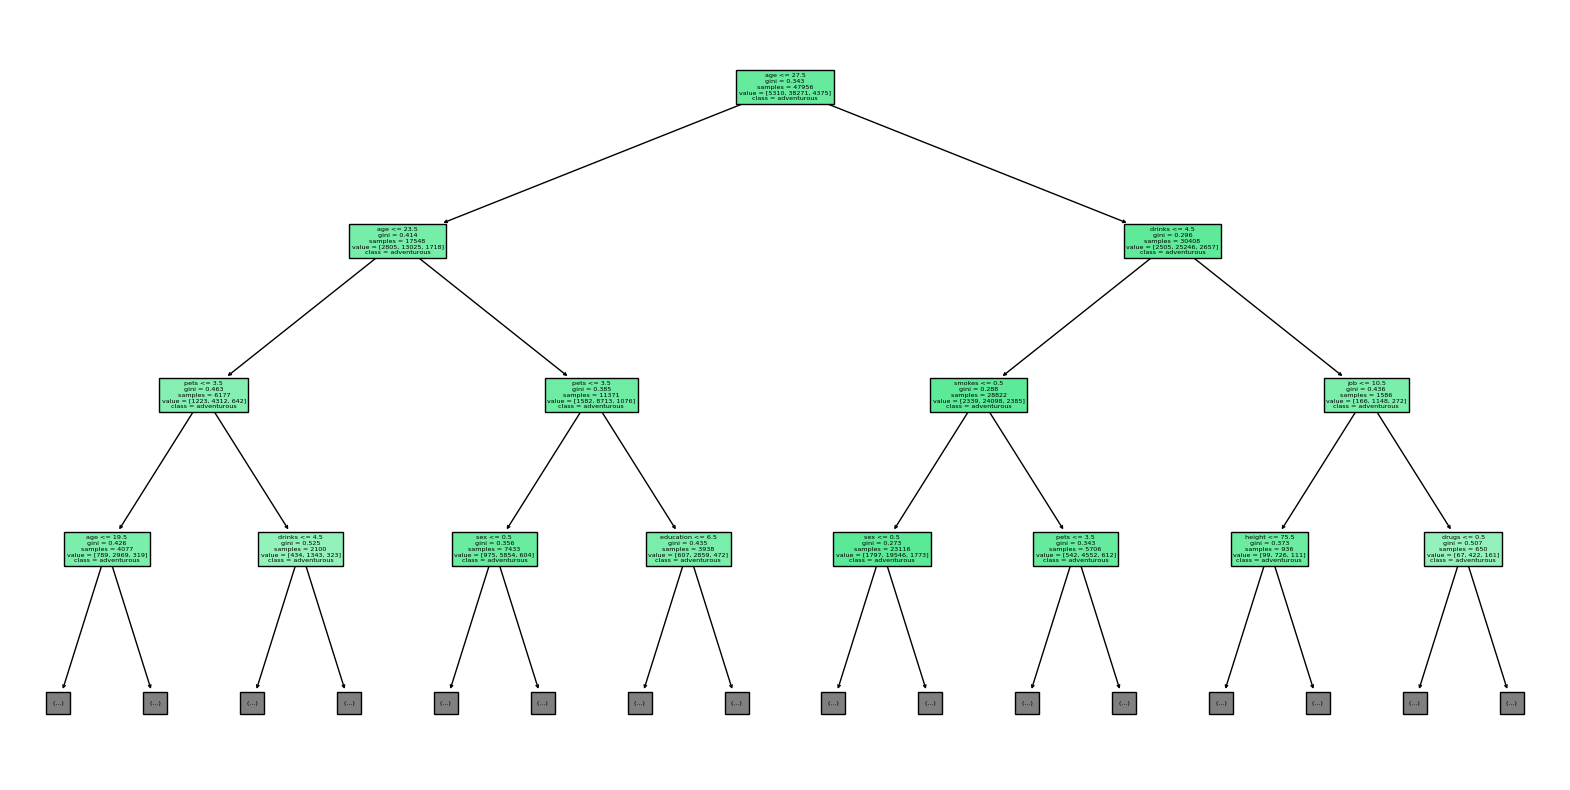

In [240]:

# Drop the first unnamed column as it seems to be an index
# df = df.drop(columns=["Unnamed: 0"])

# Handle missing values by dropping them for simplicity (alternative approaches could involve imputation)
df_clean = df.copy()

# Encoding categorical variables
label_encoders = {}
for column in cols:
    if df_clean[column].dtype == object and column != 'preference':
        le = LabelEncoder()
        df_clean[column] = le.fit_transform(df_clean[column])
        label_encoders[column] = le

# Splitting data into independent (X) and dependent (y) variables
X = df_clean.drop('preference', axis=1)
y = df_clean['preference']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=3)
plt.show()


In [241]:
df.sample(3)

age  status sex orientation body_type      diet    drinks drugs  \
3603    23  single   f    straight   average  anything  socially   NaN   
40716   31  single   m    straight   average       NaN    rarely   NaN   
1754    35  single   f    straight       NaN       NaN       NaN   NaN   

                education ethnicity  height       income  \
3603   college/university     white    67.0  unspecified   
40716  college/university     mixed    68.0  unspecified   
1754                  NaN     mixed    67.0  unspecified   

                         job offspring        pets     religion smokes  \
3603     Other & Unspecified       NaN         NaN  agnosticism     no   
40716     Tech & Engineering       NaN         NaN      atheism     no   
1754   Service & Hospitality       NaN  Likes Both          NaN     no   

         speaks   preference  
3603    english  adventurous  
40716    others  adventurous  
1754    spanish  adventurous

In [242]:
df_clean.shape
X.shape

(59946, 18)

In [243]:
Feature_Importance=clf.feature_importances_
a=np.argmax(Feature_Importance)
X.columns[a]

'height'

In [244]:
X.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'offspring', 'pets', 'religion', 'smokes', 'speaks'],
      dtype='object')

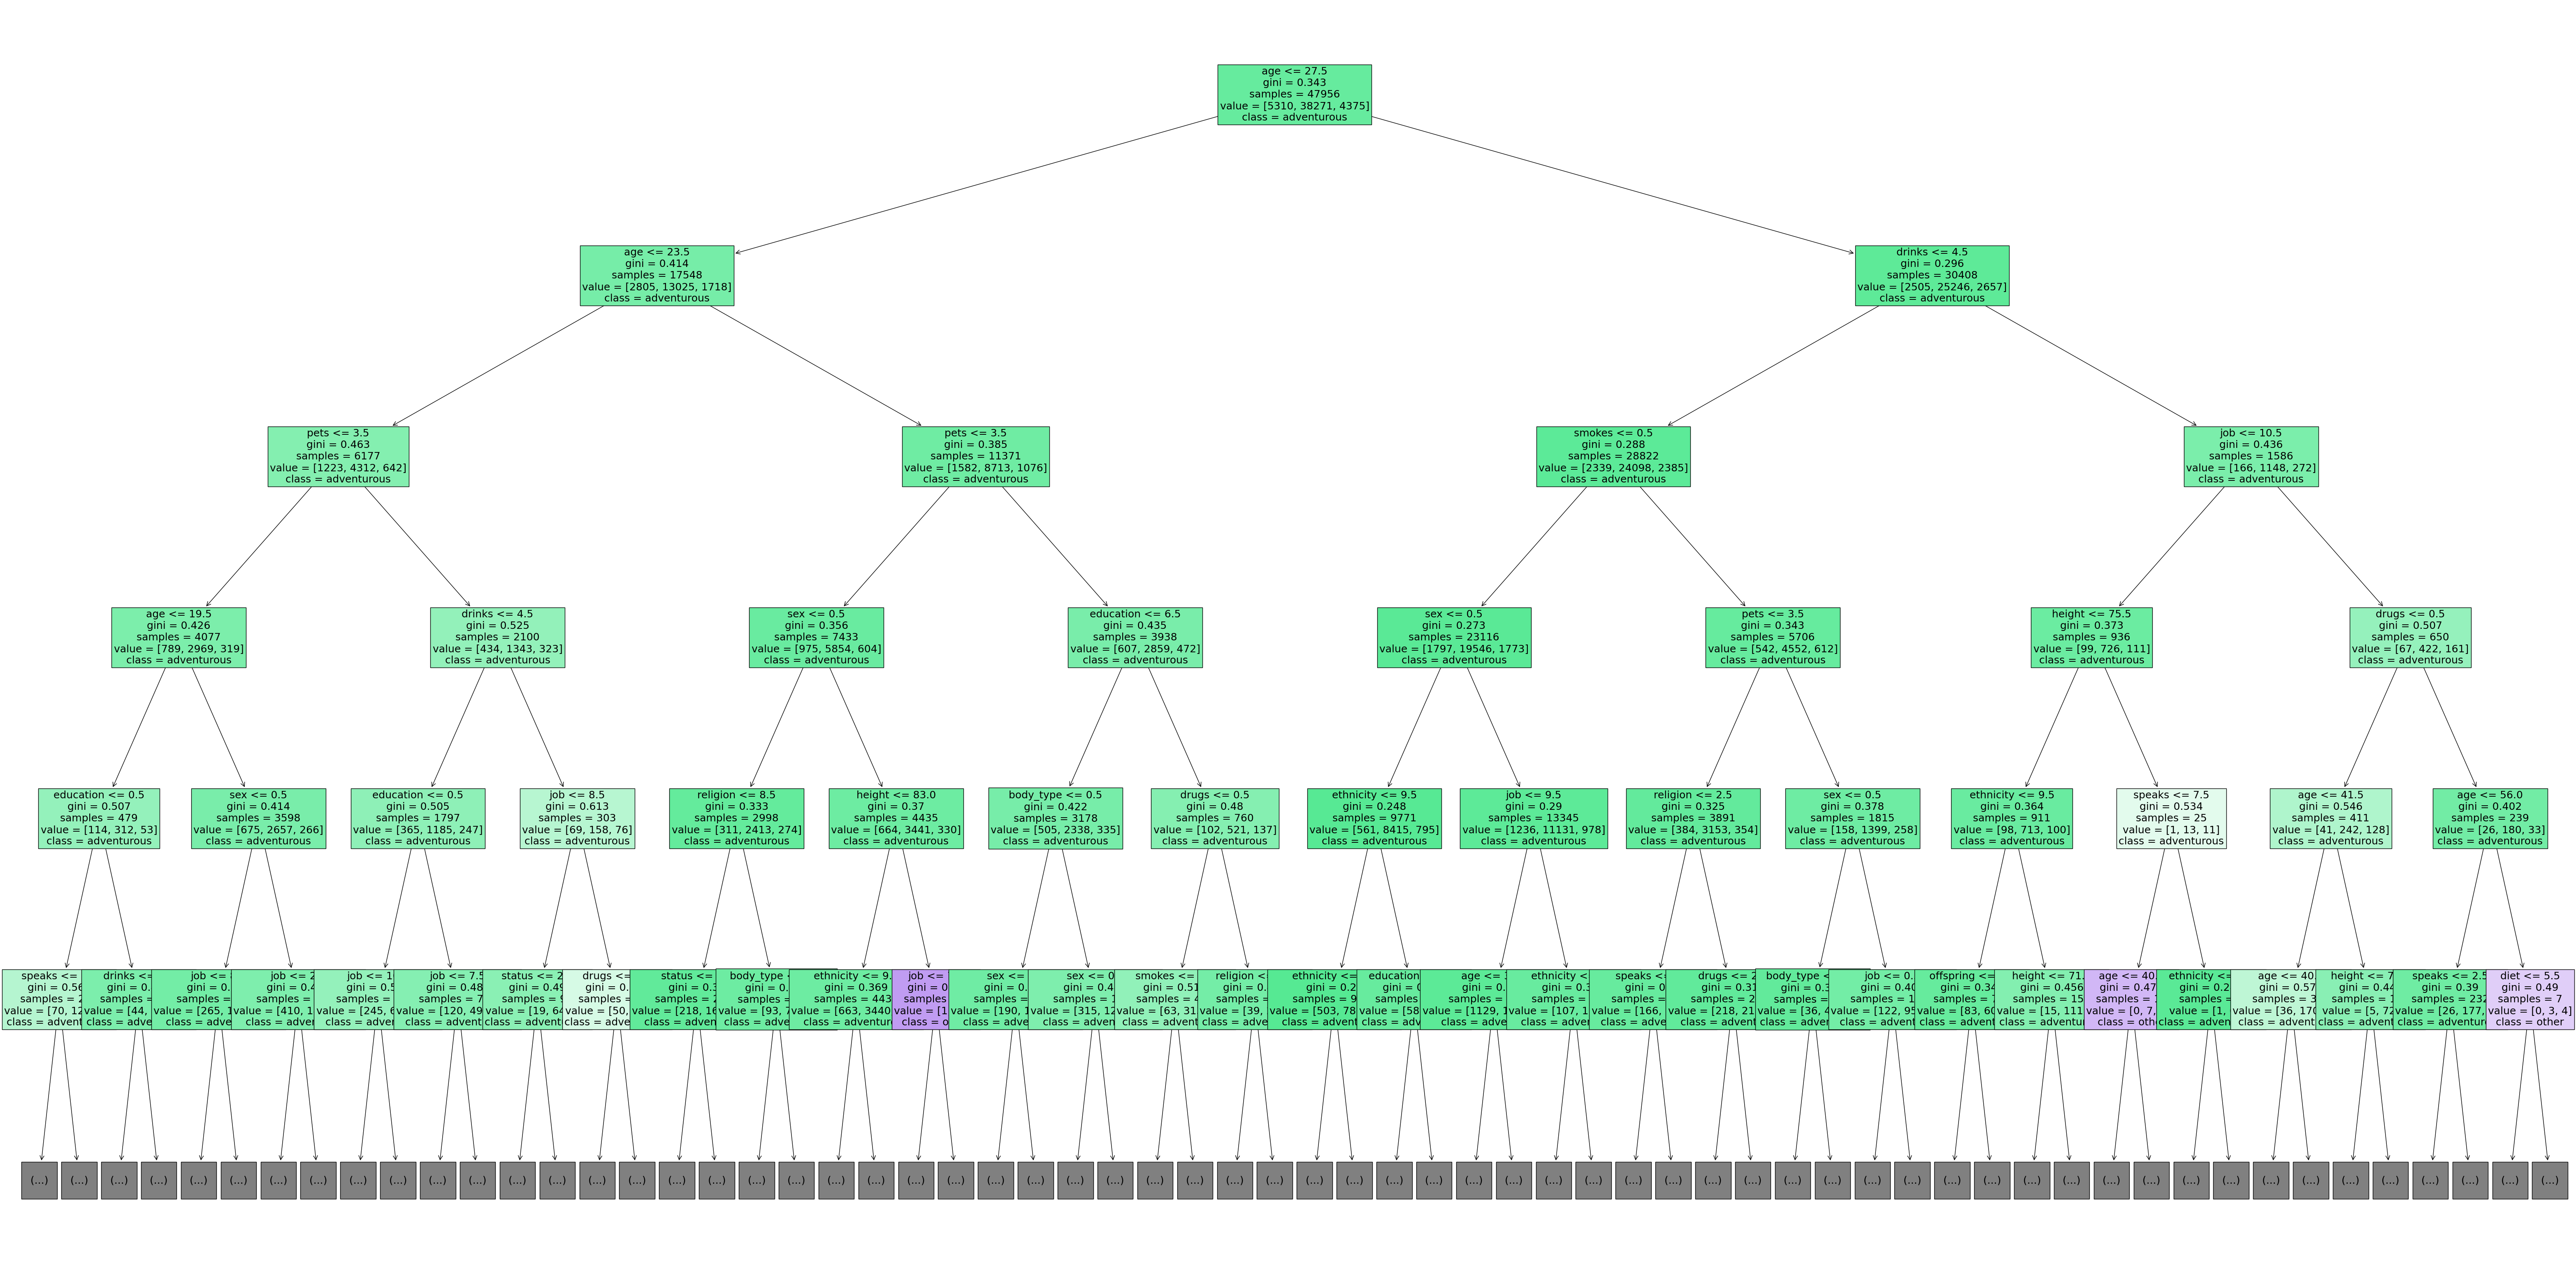

In [245]:

# Plotting the Decision Tree
plt.figure(figsize=(80,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=5,fontsize=18)
plt.show()


In [246]:
 import numpy as np
 np.average(clf.predict(X_test) == y_test)

0.6387823185988324

In [247]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,clf.predict(X_test)))
print("\n\n")
print(classification_report(y_test,clf.predict(X_test)))

[[ 209  994  148]
 [1181 7304 1041]
 [ 149  818  146]]



              precision    recall  f1-score   support

    academic       0.14      0.15      0.14      1351
 adventurous       0.80      0.77      0.78      9526
       other       0.11      0.13      0.12      1113

    accuracy                           0.64     11990
   macro avg       0.35      0.35      0.35     11990
weighted avg       0.66      0.64      0.65     11990



In [248]:
df["preference"].value_counts()

adventurous    47797
academic        6661
other           5488
Name: preference, dtype: int64

In [249]:
X_test

age  status  sex  orientation  body_type  diet  drinks  drugs  \
4800    26       3    1            2          1     0       4      0   
56896   37       3    1            1          0     6       4      0   
17834   30       3    1            2          0     0       4      0   
27275   26       3    1            2          1     0       4      3   
3335    33       3    1            2          1     0       2      3   
...    ...     ...  ...          ...        ...   ...     ...    ...   
441     20       2    1            2          5     6       6      3   
18056   29       3    1            2          0     0       0      0   
34044   31       3    0            2          2     0       4      0   
16313   45       3    1            2          0     6       4      3   
19771   48       3    1            2          1     0       4      0   

       education  ethnicity  height  income  job  offspring  pets  religion  \
4800           1          9    70.0       2    6          6     4         9   
56896          8          9    70.0       3    6          6     3         9   
17834          3          0    65.0       3    9          0     1         1   
27275          0          5    69.0       3    9          6     3         8   
3335           0          9    66.0       3    2          0     2         1   
...          ...        ...     ...     ...  ...        ...   ...       ...   
441            8         10    71.0       3    1          3     4         9   
18056          0          9    69.0       3    9          0     1         9   
34044          0          9    63.0       3    6          2     4         4   
16313          3          9    72.0       3    6          6     2         0   
19771          3          9    69.0       1    3          6     2         9   

       smokes  speaks  
4800        0       7  
56896       0       7  
17834       0       8  
27275       4       8  
3335        0       4  
...       ...     ...  
441         5       7  
18056       0       8  
34044       0       7  
16313       0       8  
19771       0       7  

[11990 rows x 18 columns]

In [250]:
print(clf.tree_.max_depth)

36


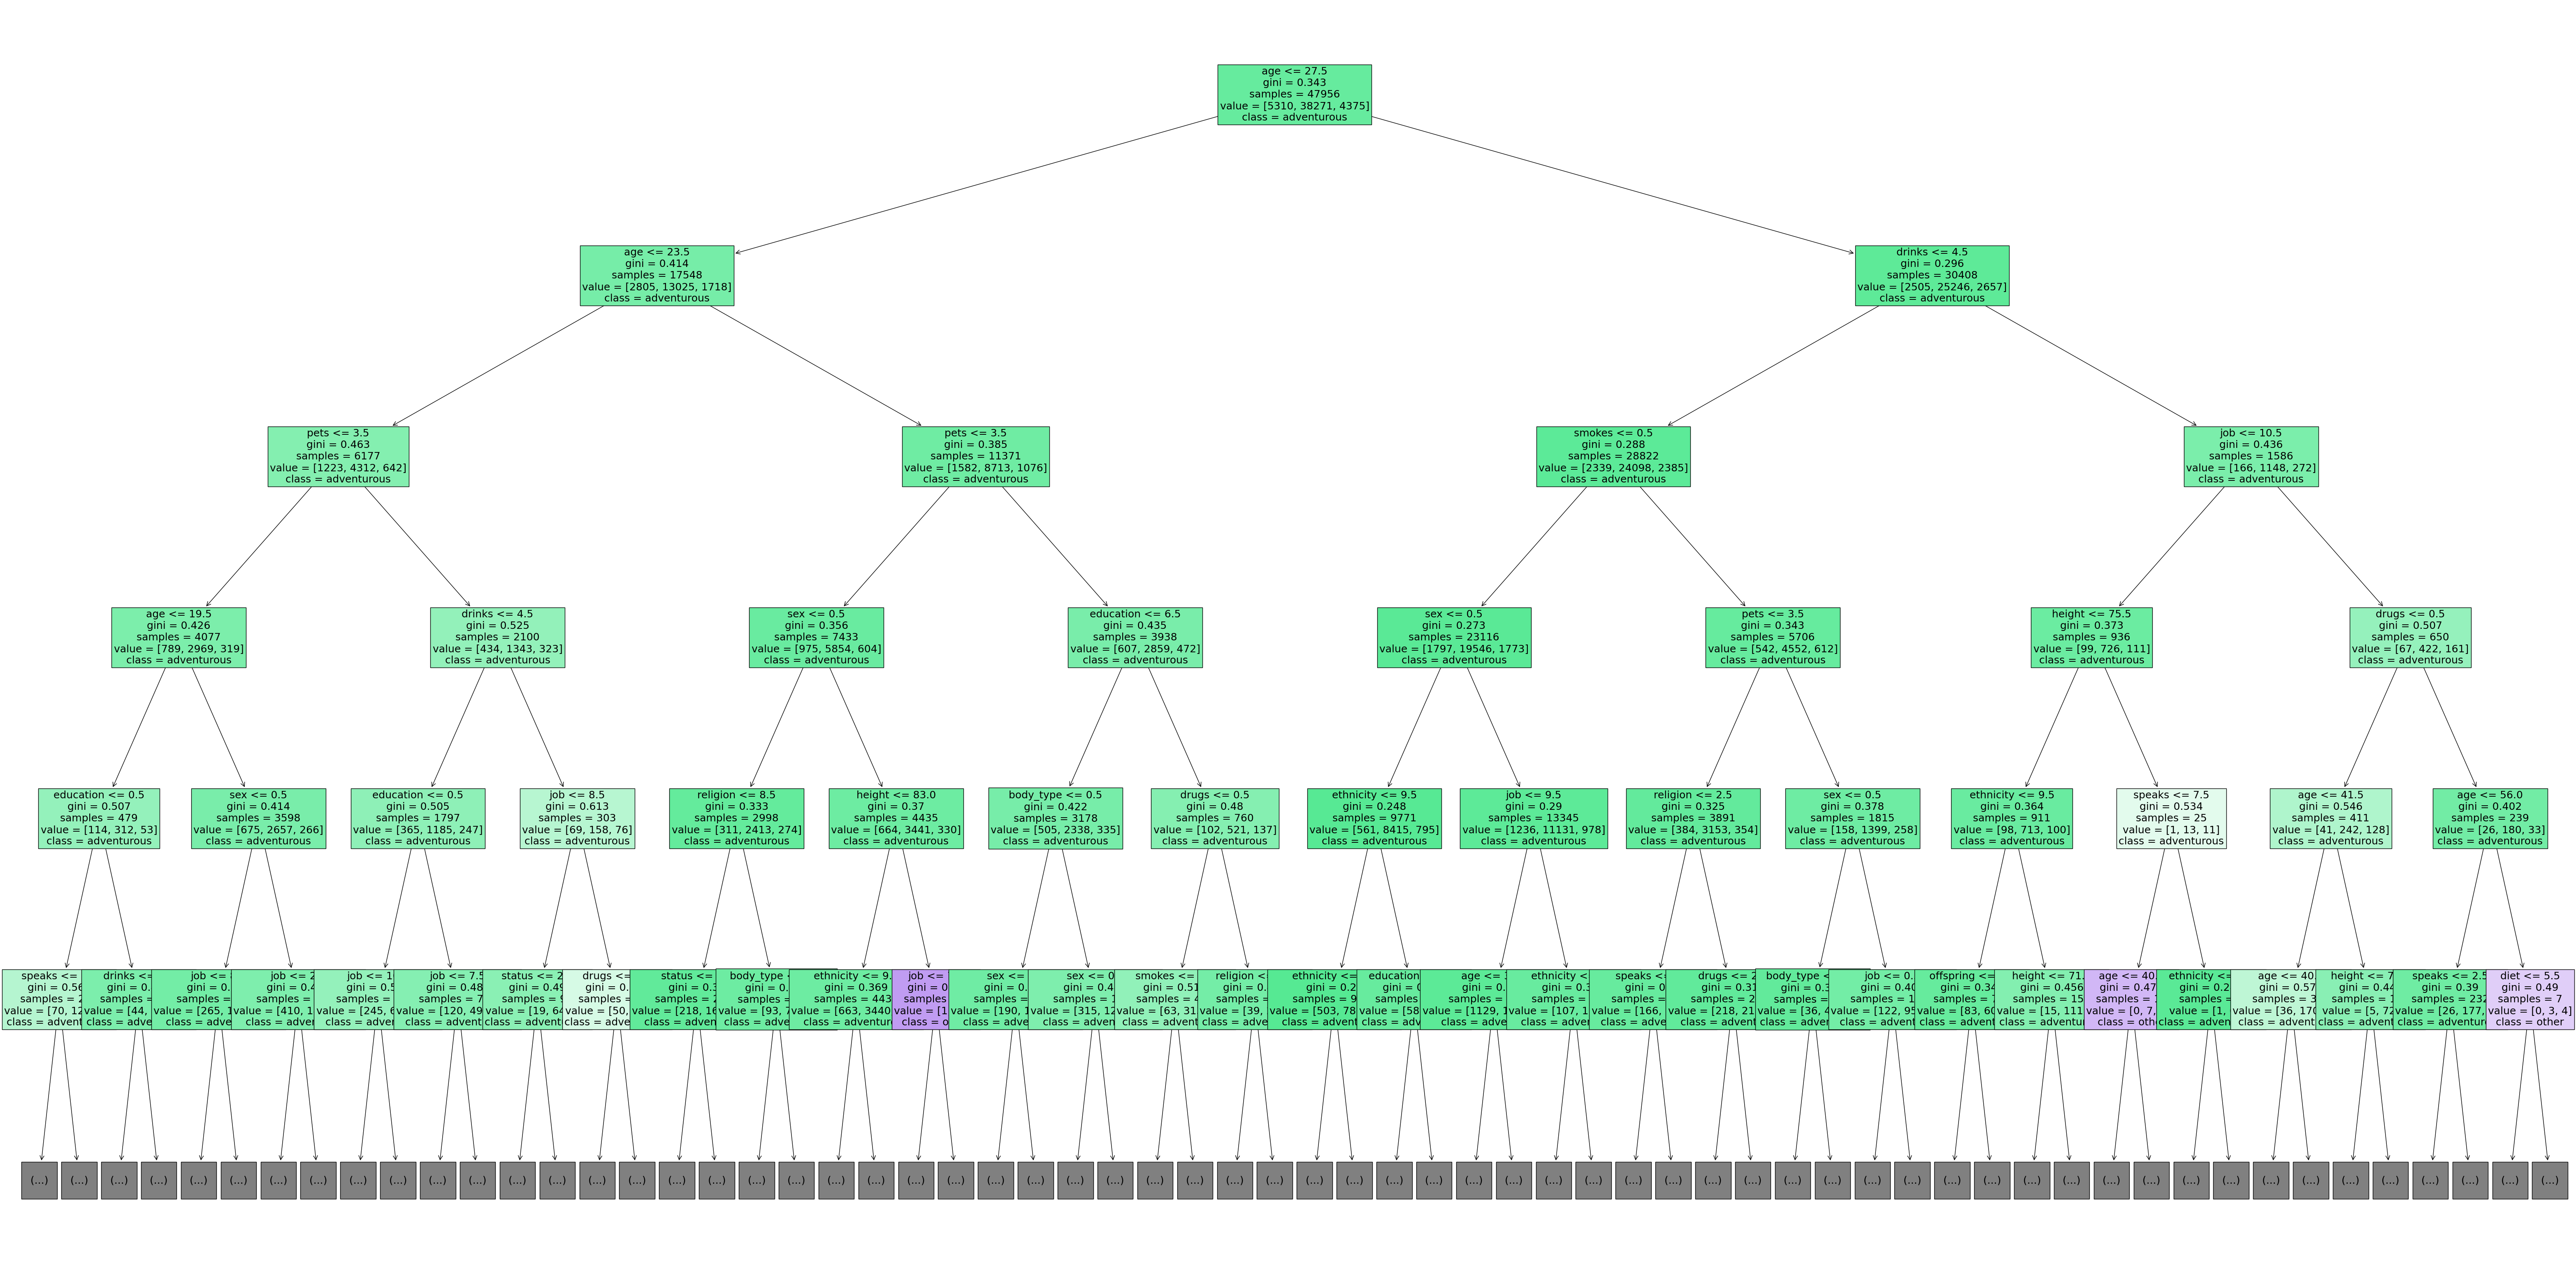

In [251]:

# Plotting the Decision Tree
plt.figure(figsize=(80,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=5,fontsize=18)
plt.show()


# A tuned dicision tree classifier to avoid overfitting:

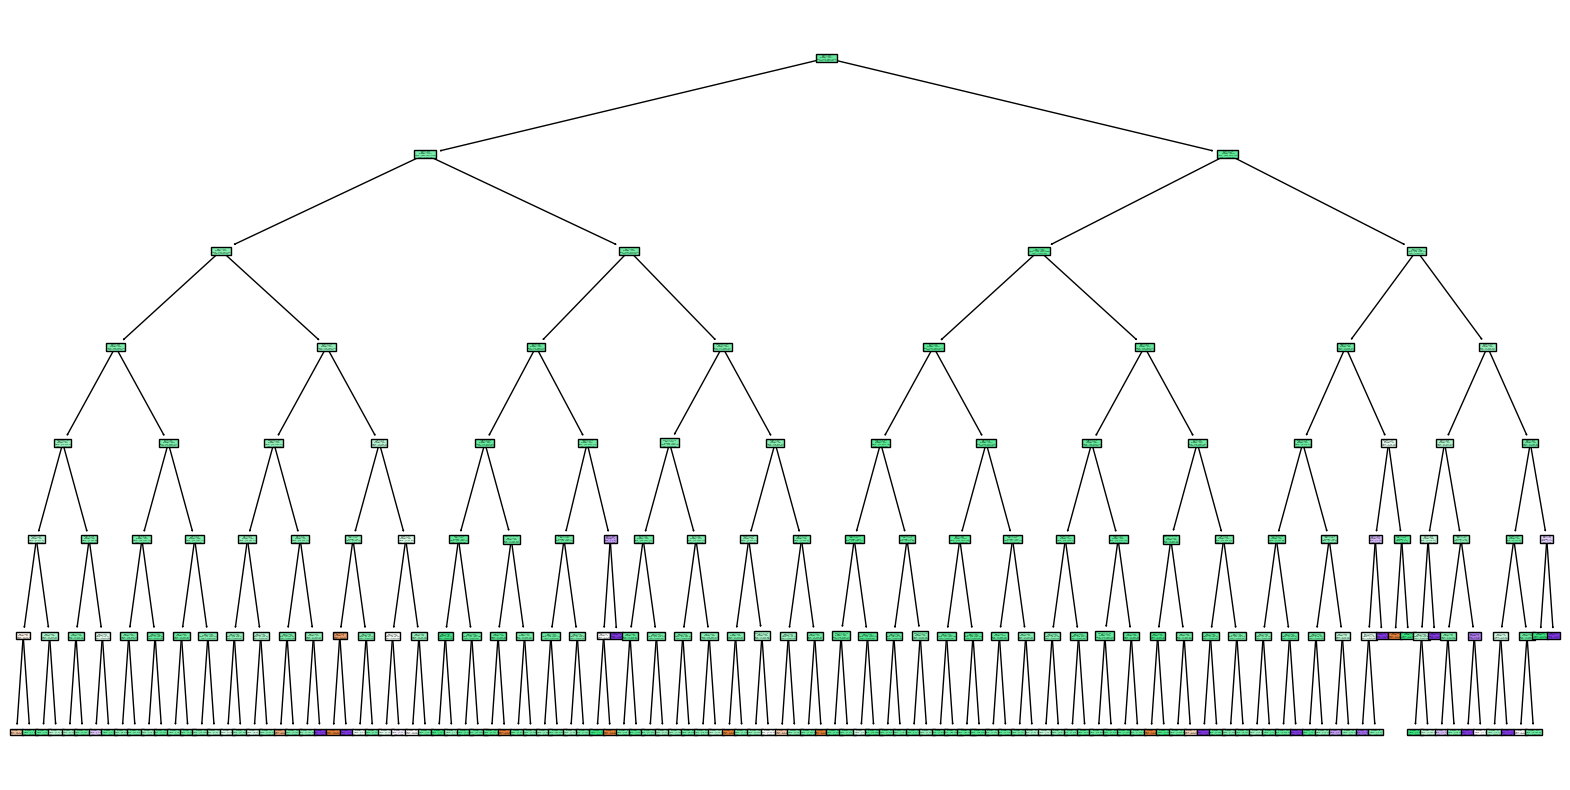

In [252]:
# Training the Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=42,max_depth=7)
clf2.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=clf2.classes_, max_depth=7)
plt.show()


In [253]:
np.average(y_test==clf2.predict(X_test))

0.7930775646371977

In [254]:
np.average(y_train==clf2.predict(X_train))

0.7995454166319126

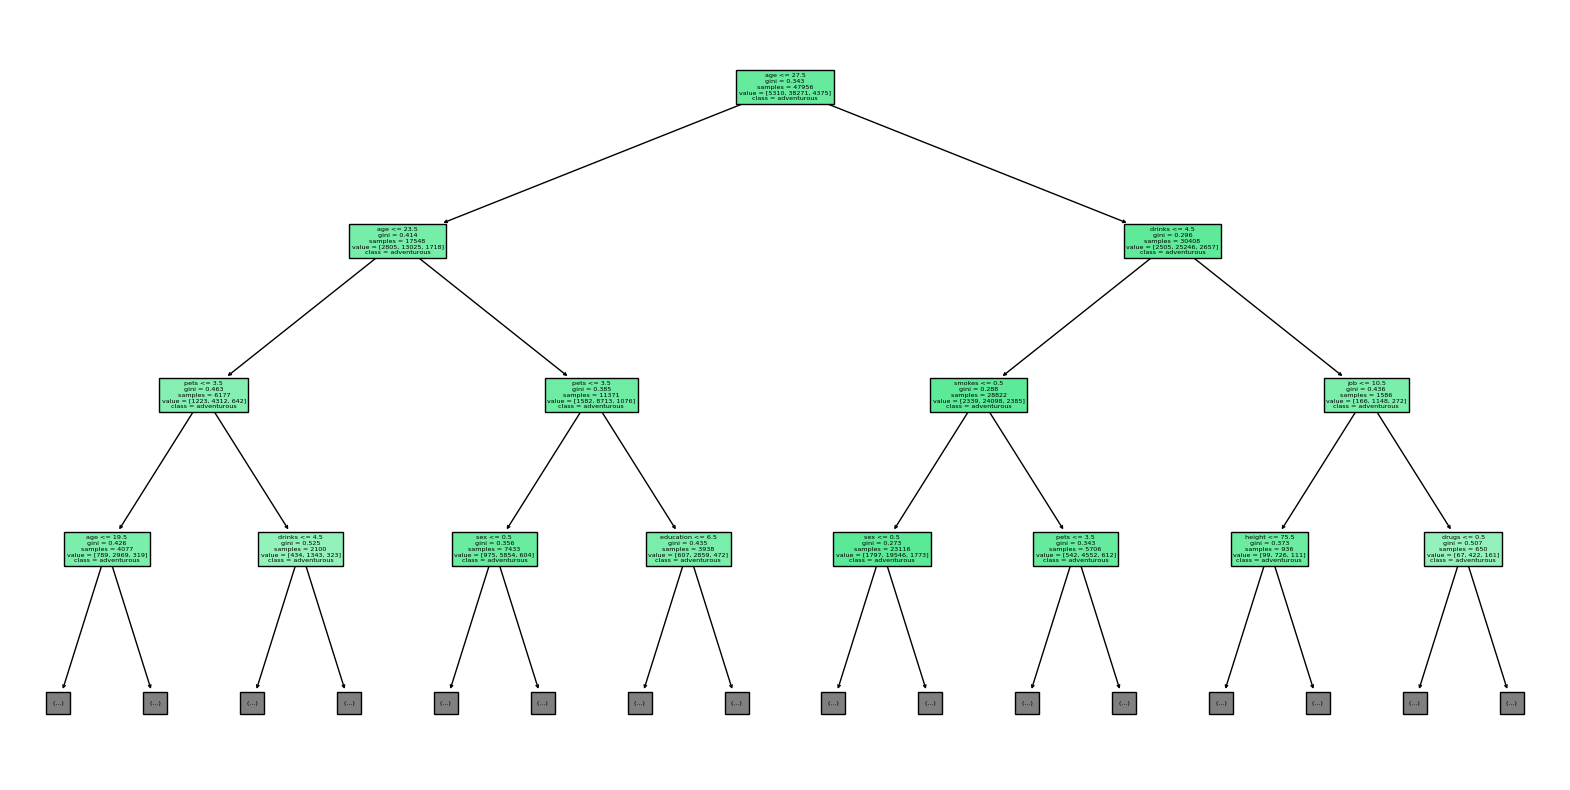

In [255]:
# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=clf2.classes_, max_depth=3)
plt.show()

In [256]:
Feature_Importance=clf2.feature_importances_
print(Feature_Importance)
a=np.argmax(Feature_Importance)
print(a)
print(X.columns[a])
print(X.columns)

#Feature_Importance.sort()
b=np.argmax(Feature_Importance[1:])
print(b)
print(X.columns[b])

Feature_Importance=np.delete(Feature_Importance,[11,0])
c=np.argmax(Feature_Importance)
print(c)
print(X.columns[c])

[0.3452252  0.01463889 0.04628781 0.00779259 0.03512821 0.01307496
 0.08017546 0.04840698 0.03616668 0.05650008 0.0492241  0.00851291
 0.08039335 0.01795592 0.06651878 0.01823634 0.04085736 0.03490437]
0
age
Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'offspring', 'pets', 'religion', 'smokes', 'speaks'],
      dtype='object')
11
income
10
height


[[   3 1341    7]
 [   7 9490   29]
 [   4 1093   16]]



              precision    recall  f1-score   support

    academic       0.21      0.00      0.00      1351
 adventurous       0.80      1.00      0.88      9526
       other       0.31      0.01      0.03      1113

    accuracy                           0.79     11990
   macro avg       0.44      0.34      0.31     11990
weighted avg       0.69      0.79      0.71     11990



<Axes: xlabel='preference', ylabel='count'>

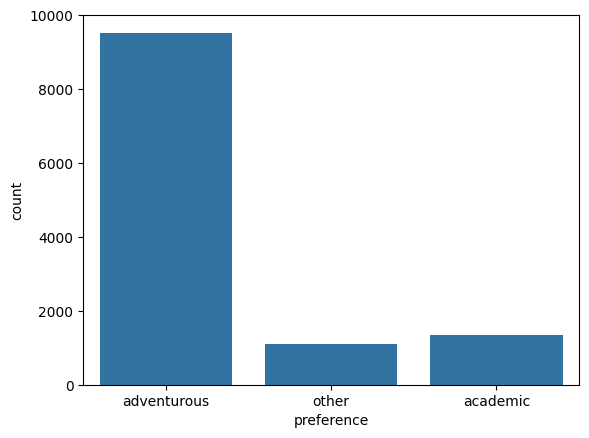

In [257]:
print(confusion_matrix(y_test,clf2.predict(X_test)))
print("\n\n")
print(classification_report(y_test,clf2.predict(X_test)))
#sns.histplot(y_test)
plt.figure()
sns.countplot(x=y_test)

In [258]:
y_pred=clf2.predict(X_test)
print(y_pred)
len(y_test.index)
ind=y_test.index
ind

['adventurous' 'adventurous' 'adventurous' ... 'adventurous' 'adventurous'
 'adventurous']


Int64Index([ 4800, 56896, 17834, 27275,  3335, 45352,  9030, 13863, 23413,
            27778,
            ...
            30224,  4865, 21769, 31466, 32618,   441, 18056, 34044, 16313,
            19771],
           dtype='int64', length=11990)

# Some Additional Analysis (Bias in The Model):

In [259]:
a=((y_test=='academic') & (y_pred=='adventurous'))
#ind
len(a)
np.sum(a)
ind2=ind[a]
len(ind2)
ind2


Int64Index([28048, 47384, 46265, 48981, 27205, 10469, 41790, 18237, 46909,
            59007,
            ...
            58168,  9165,  4120, 14144, 16330,  2829, 33713, 26881,  4865,
            18056],
           dtype='int64', length=1341)

In [263]:
df_misclassified=df.loc[ind2]
df_misclassified.sample(3)
df_misclassified.shape
X_test.shape

(11990, 18)

In [271]:
X_test_2=df.loc[ind]
X_test_2.sample(3)
#X_test_2.shape

age  status sex orientation body_type        diet    drinks  drugs  \
41547   34  single   f    straight      thin  vegetarian  socially  never   
26821   25  single   m    straight  athletic    anything  socially    NaN   
13835   29  single   f    straight  athletic         NaN  socially  never   

                education ethnicity  height       income                  job  \
41547        ph.d program    indian    66.0  unspecified    Health & Medicine   
26821          space camp     white    72.0  unspecified                  NaN   
13835  college/university     asian    63.0  unspecified  Other & Unspecified   

                            offspring pets religion     smokes    speaks  \
41547  Does Not Have a Kid, Want Kids  NaN    other         no    others   
26821                             NaN  NaN  atheism  sometimes   english   
13835                             NaN  NaN      NaN         no   chinese   

        preference  
41547  adventurous  
26821  adventurous  
13835  adventurous

Text(0.5, 1.0, 'Original data')

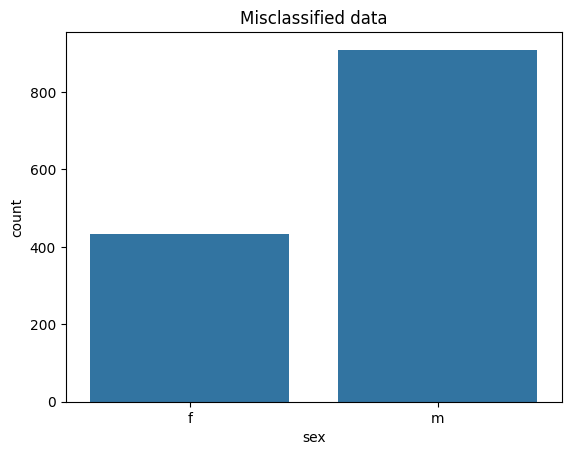

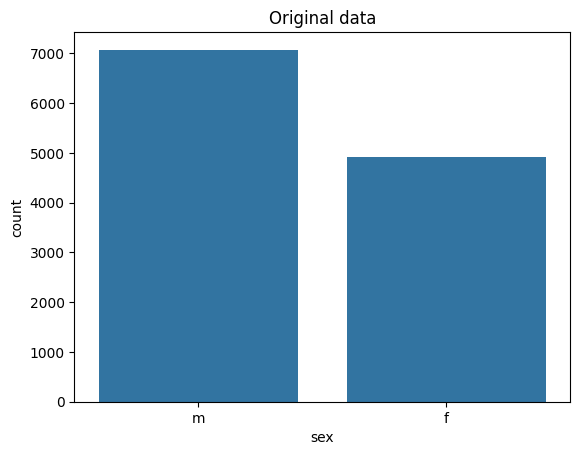

In [276]:
sns.countplot(data=df_misclassified, x='sex')
plt.title("Misclassified data")
plt.figure()
sns.countplot(data=X_test_2, x='sex')
plt.title("Original data")
# So, as it can be seen in the following 2 plots,
# male academics are
# more exposed to be misclassified as adventurous

Text(0.5, 1.0, 'Original data')

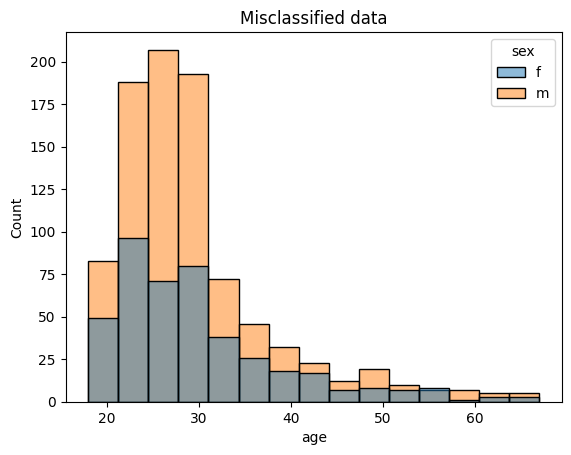

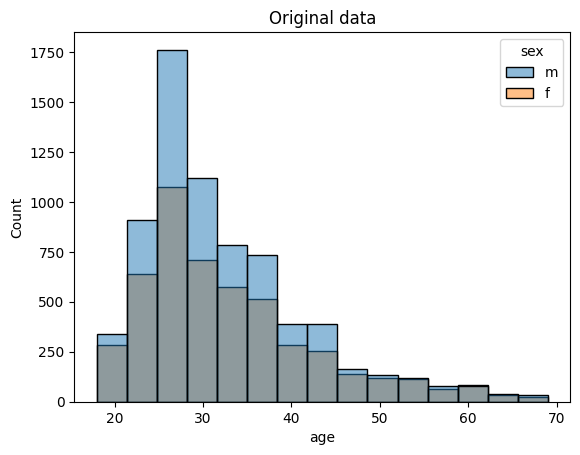

In [284]:
sns.histplot(data=df_misclassified,x='age',bins=15,hue='sex')
plt.title("Misclassified data")
plt.figure()
sns.histplot(data=X_test_2,x='age',bins=15,hue='sex')
plt.title("Original data")
# So, as it can be seen in the following 2 plots, overall, as discussed above,
# male academics are more exposed to be misclassified
# as adventurous than female ones; however, the highest bias
# is against males aged around 25-27

Text(0.5, 1.0, 'Original data')

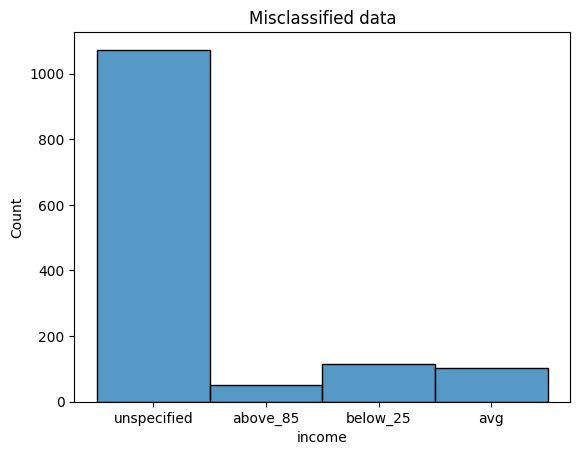

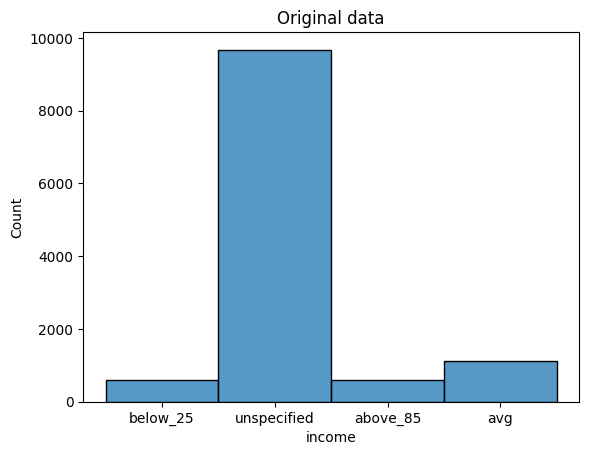

In [286]:
sns.histplot(data=df_misclassified, x='income')
plt.title("Misclassified data")
plt.figure()
sns.histplot(data=X_test_2, x='income')
plt.title("Original data")
# So, as it can be seen in the following 2 plots,
# Poor academics are
# more exposed to be misclassified as adventurous

Text(0.5, 1.0, 'Original data')

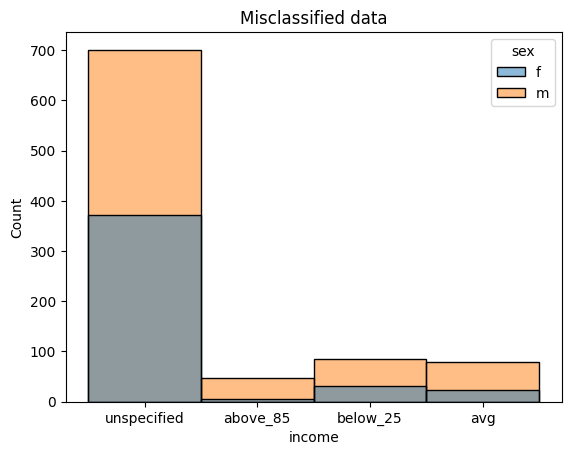

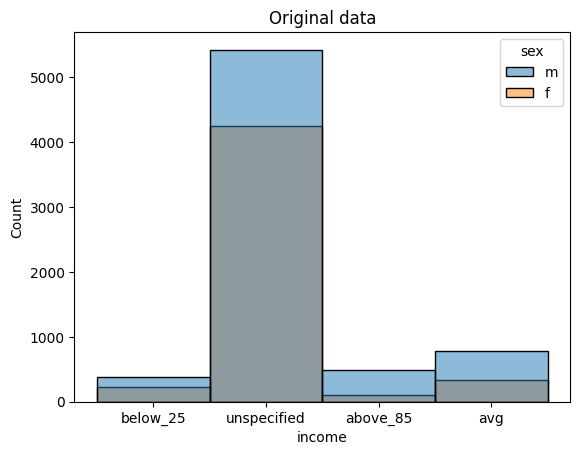

In [287]:
sns.histplot(data=df_misclassified, x='income',hue='sex')
plt.title("Misclassified data")
plt.figure()
sns.histplot(data=X_test_2, x='income',hue='sex')
plt.title("Original data")
# So, as it can be seen in the following 2 plots, overall, as discussed above,
# Poor academics are
# more exposed to be misclassified as adventurous; however, the highest bias
# is against males of low income and high income

Text(0.5, 1.0, 'Original data')

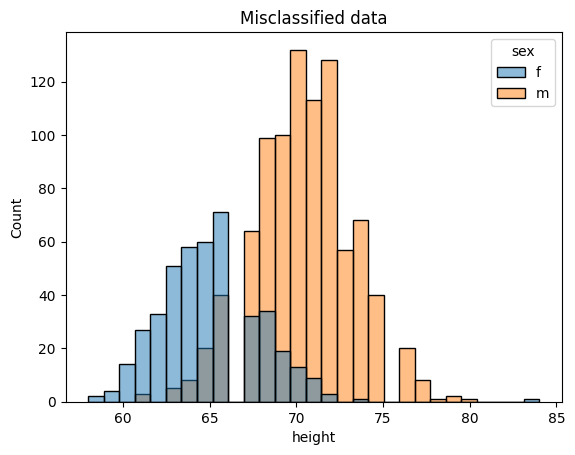

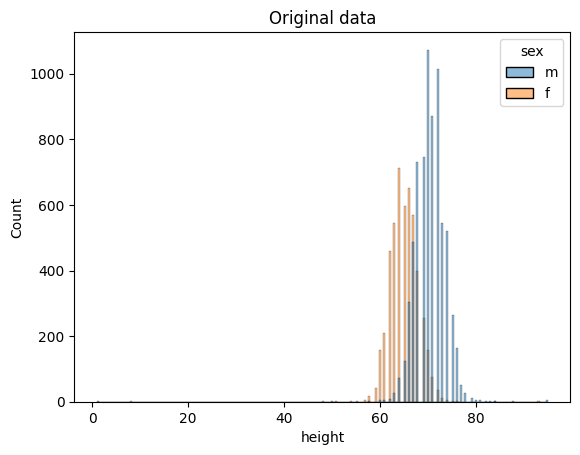

In [289]:
sns.histplot(data=df_misclassified, x='height',hue='sex')
plt.title("Misclassified data")
plt.figure()
sns.histplot(data=X_test_2, x='height',hue='sex')
plt.title("Original data")
# Don't know what to conclude :)

Text(0.5, 1.0, 'Original data')

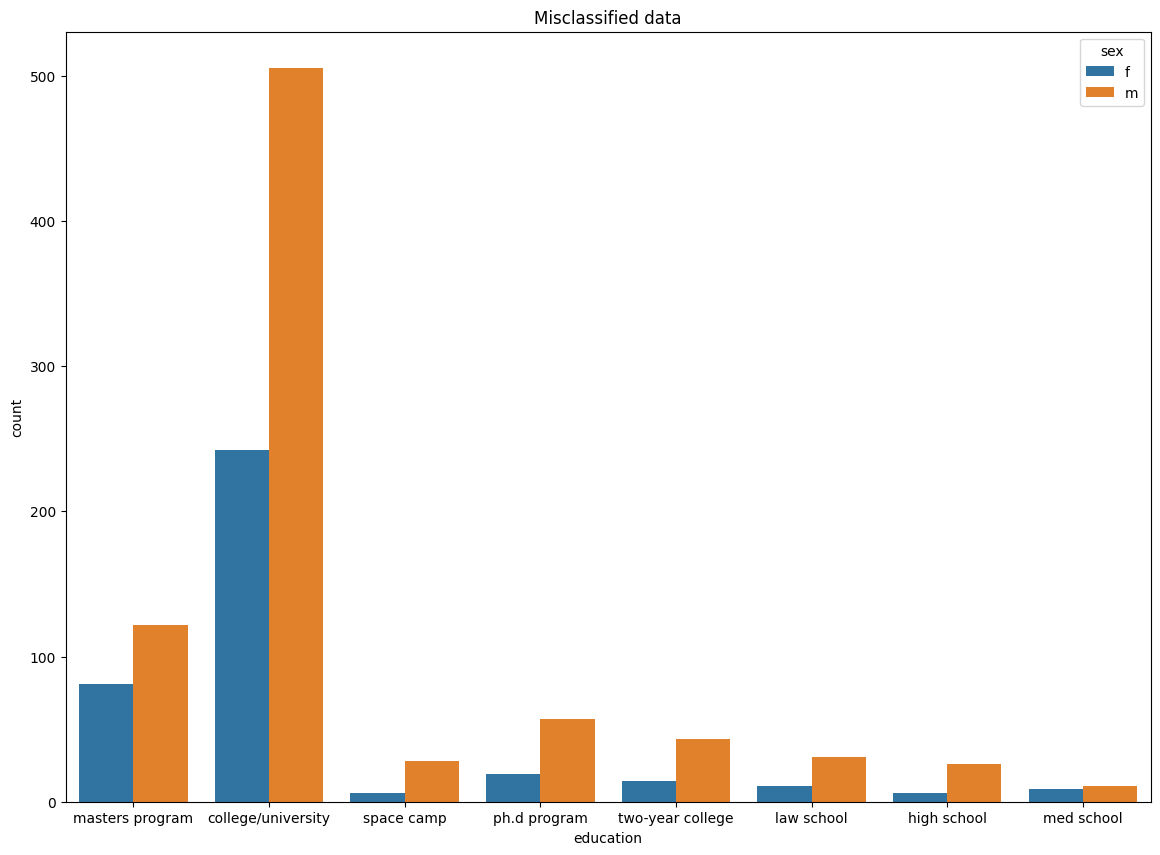

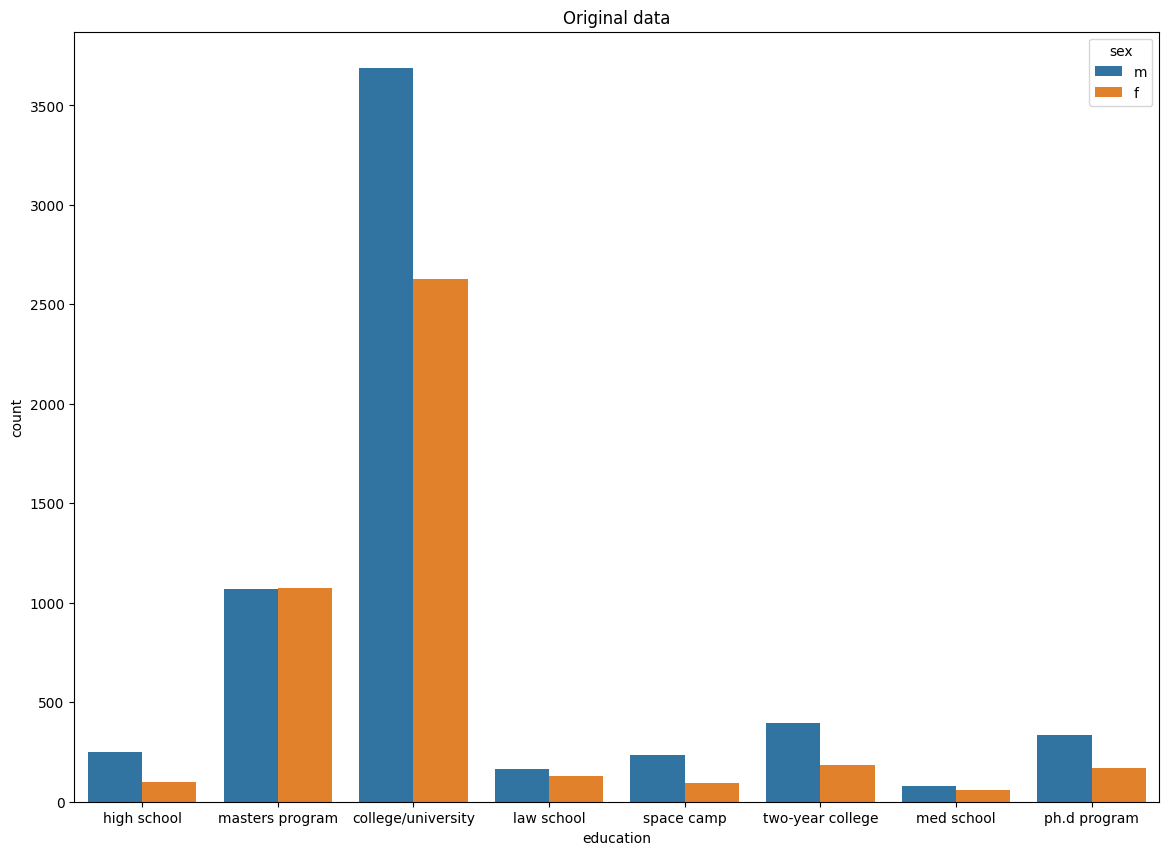

In [298]:
plt.figure(figsize=(14,10))
sns.countplot(data=df_misclassified,x='education',hue='sex')
plt.title("Misclassified data")
plt.figure(figsize=(14,10))
sns.countplot(data=X_test_2, x='education',hue='sex')
plt.title("Original data")
# Again when compared, more males in PHD and Master's program
# are exposed to be misclassified than females

Text(0.5, 1.0, 'Original data')

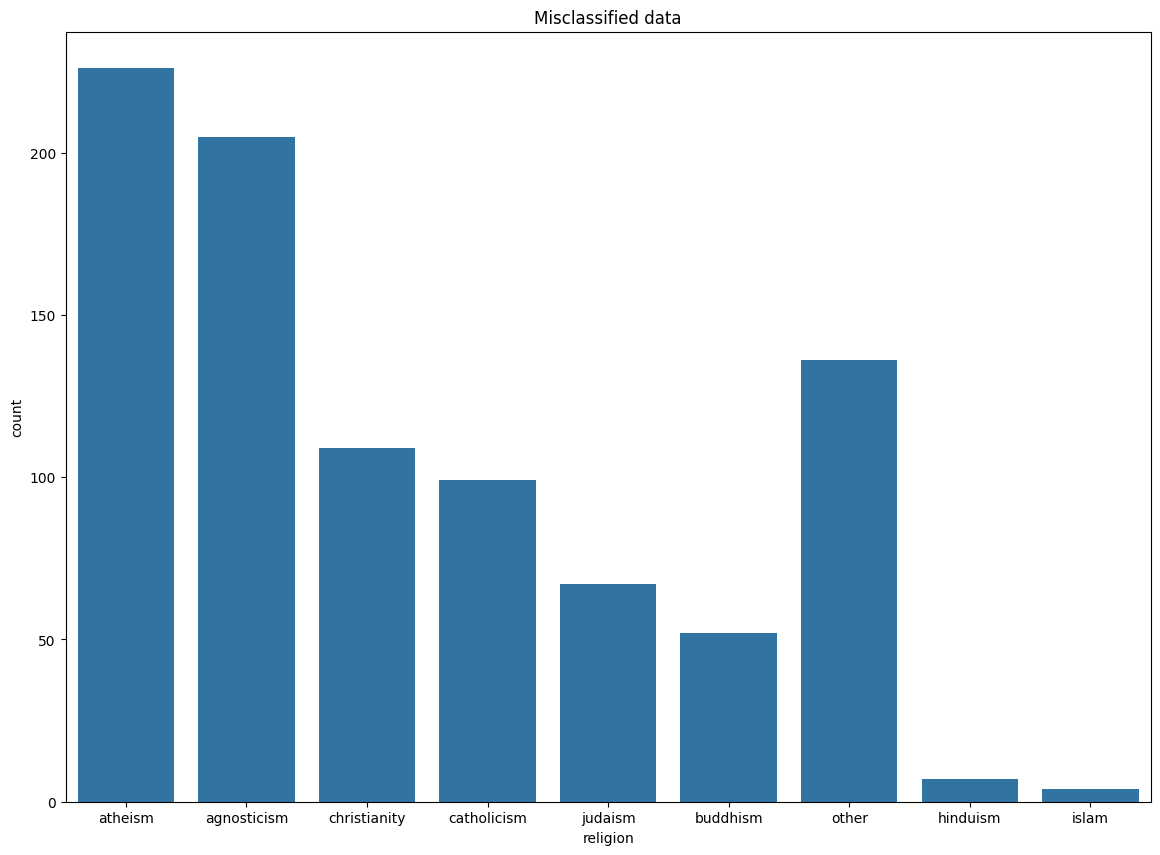

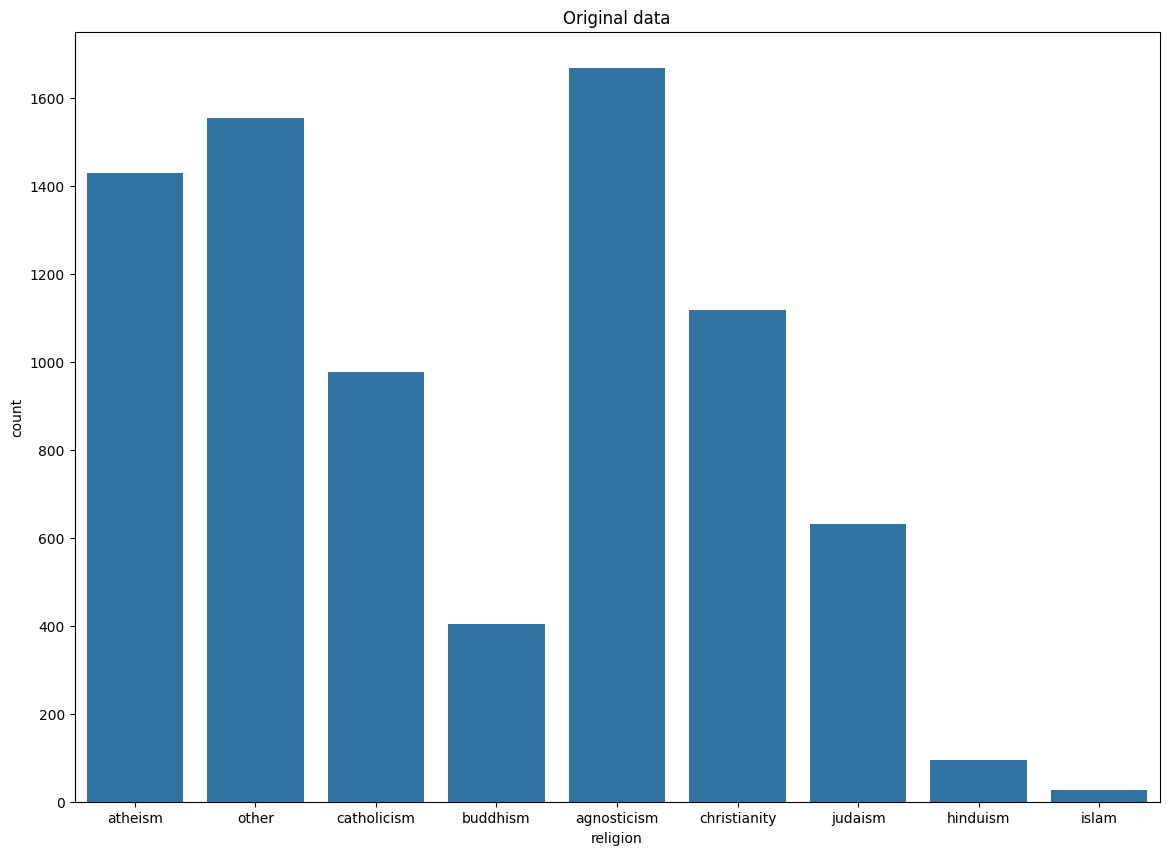

In [300]:
plt.figure(figsize=(14,10))
sns.countplot(data=df_misclassified,x='religion')
plt.title("Misclassified data")
plt.figure(figsize=(14,10))
sns.countplot(data=X_test_2, x='religion')
plt.title("Original data")
# Not much to say :)

Text(0.5, 1.0, 'Original data')

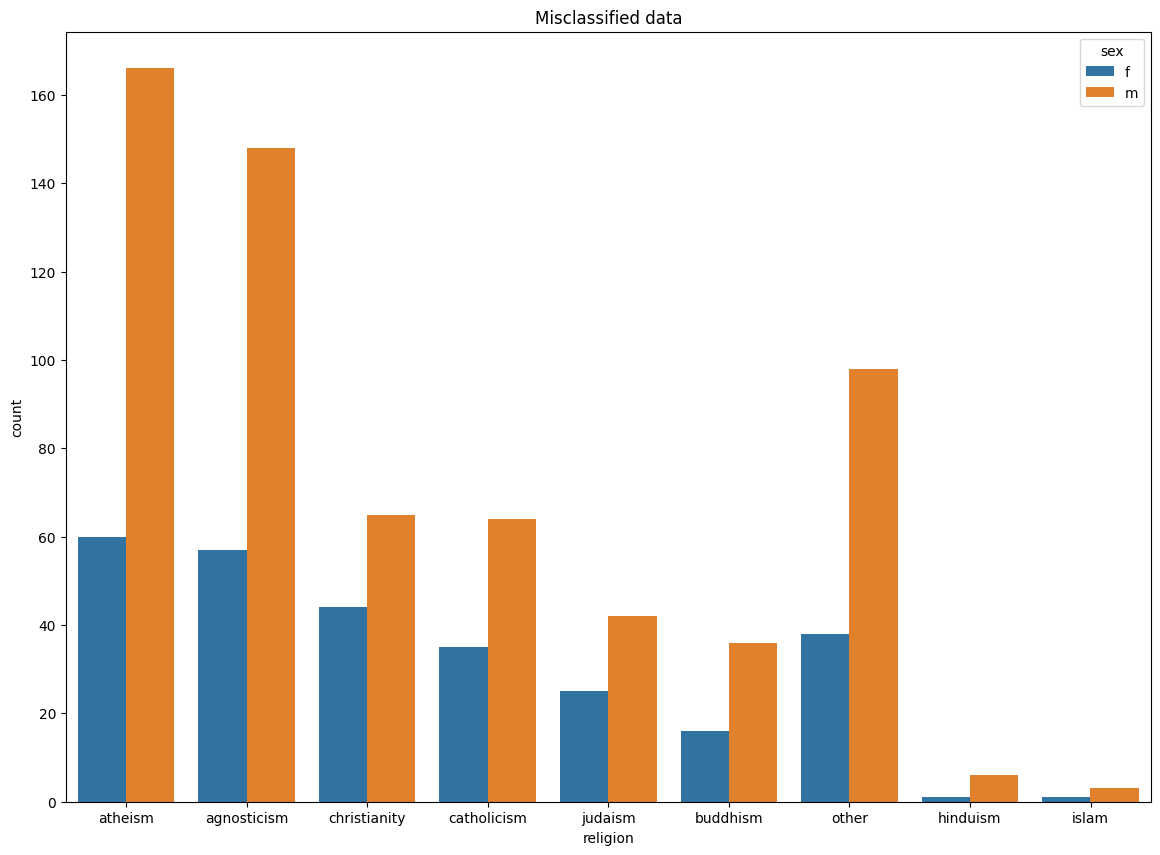

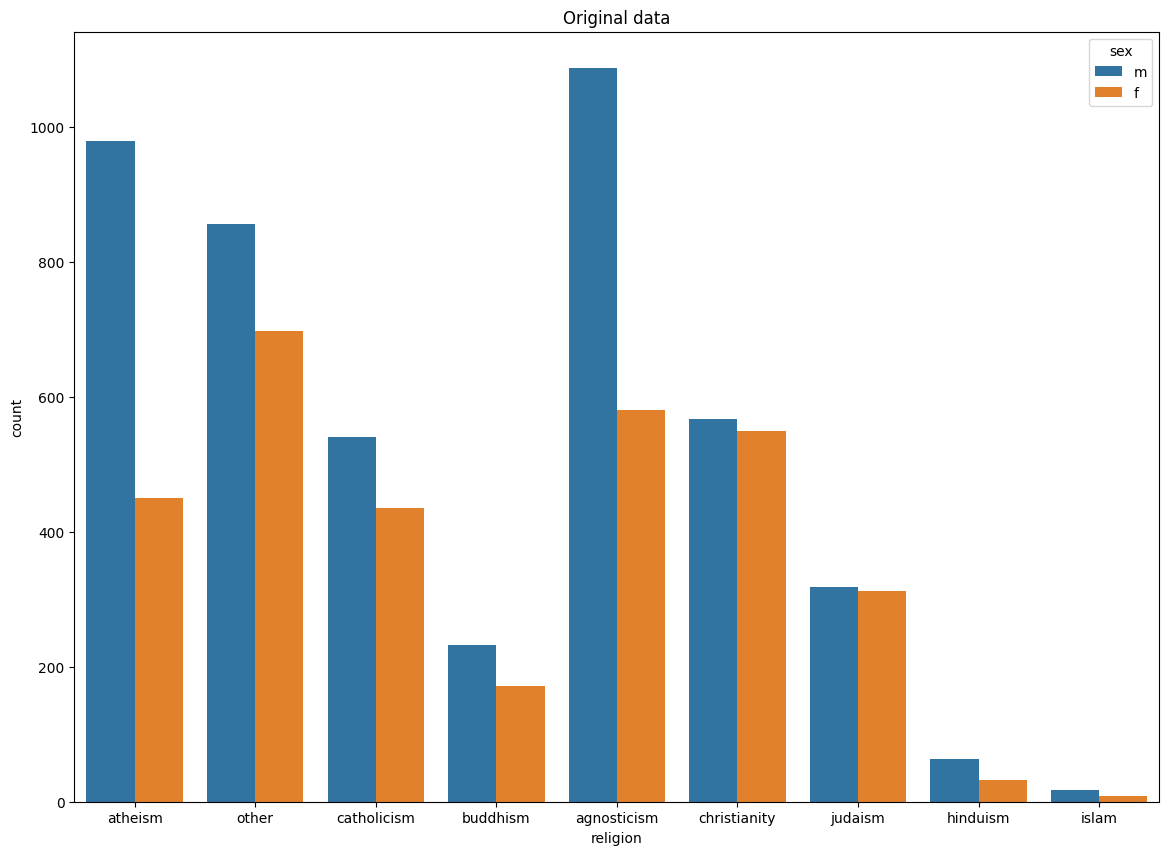

In [299]:
plt.figure(figsize=(14,10))
sns.countplot(data=df_misclassified,x='religion',hue='sex')
plt.title("Misclassified data")
plt.figure(figsize=(14,10))
sns.countplot(data=X_test_2, x='religion',hue='sex')
plt.title("Original data")
# Not much to say :)

Text(0.5, 1.0, 'Original data')

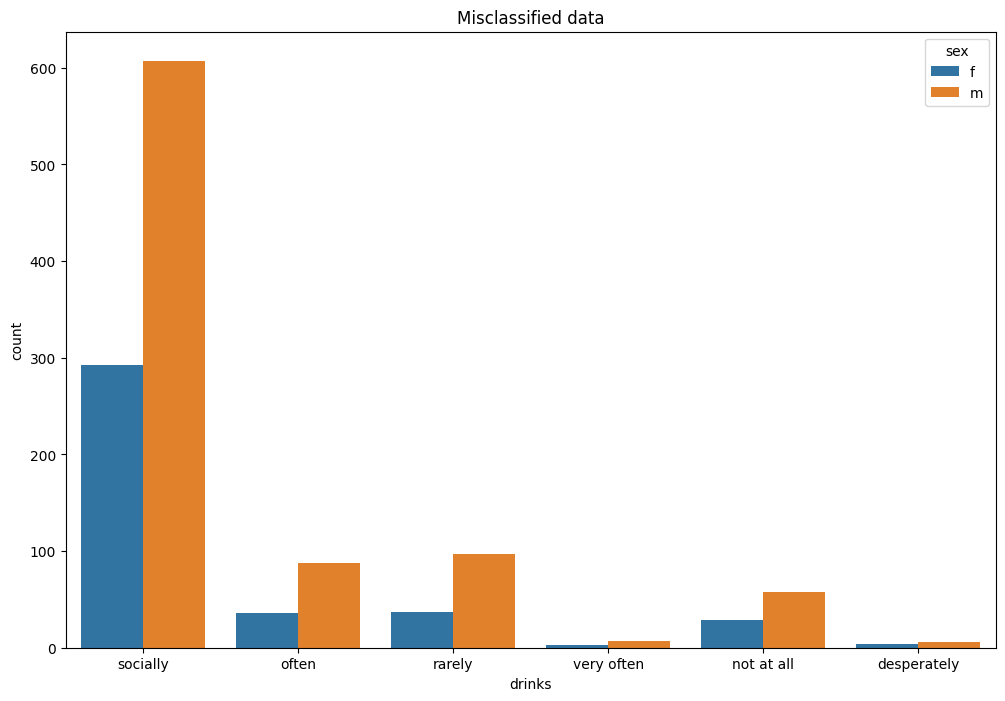

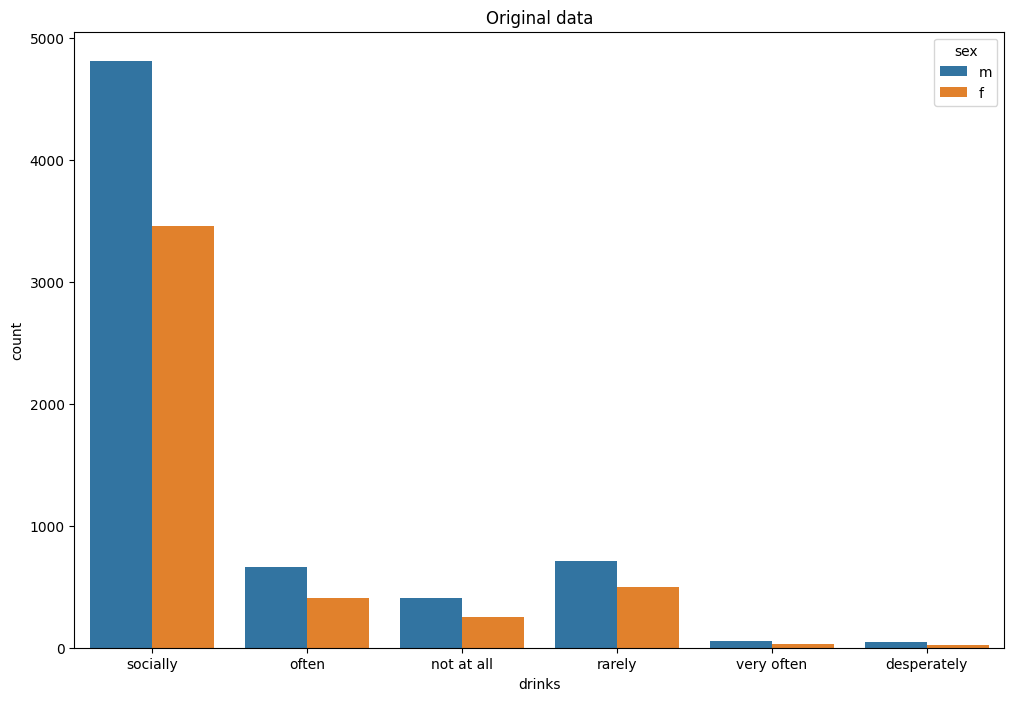

In [304]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_misclassified,x='drinks',hue='sex')
plt.title("Misclassified data")
plt.figure(figsize=(12,8))
sns.countplot(data=X_test_2, x='drinks',hue='sex')
plt.title("Original data")
# Again, if you drink (No matter how often)
# then mode misclassifies men more than females


Text(0.5, 1.0, 'Original data')

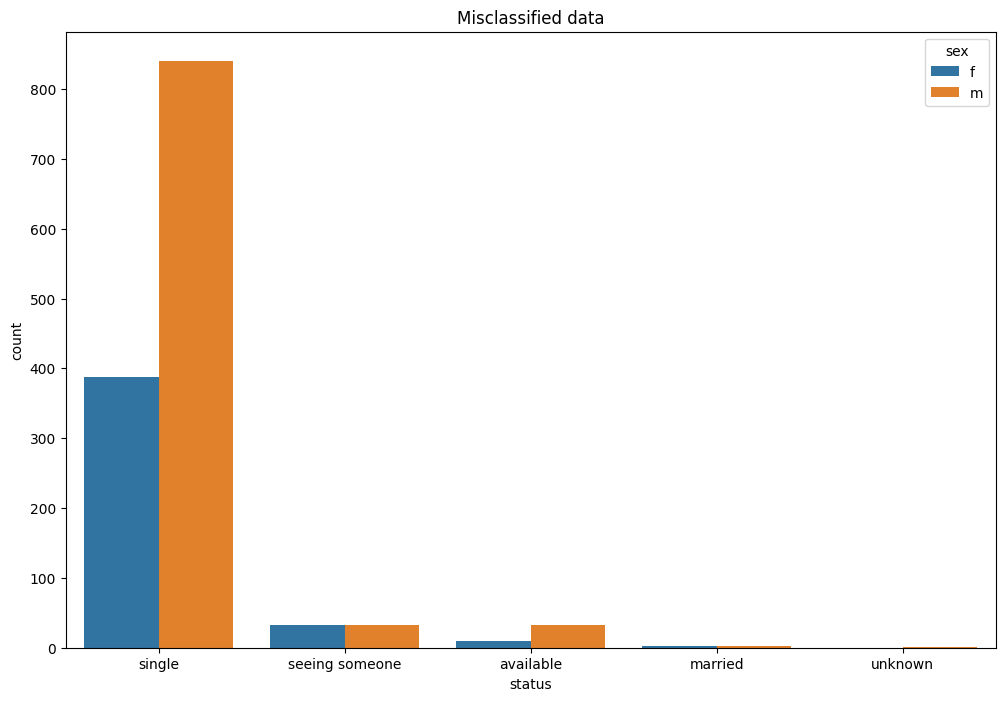

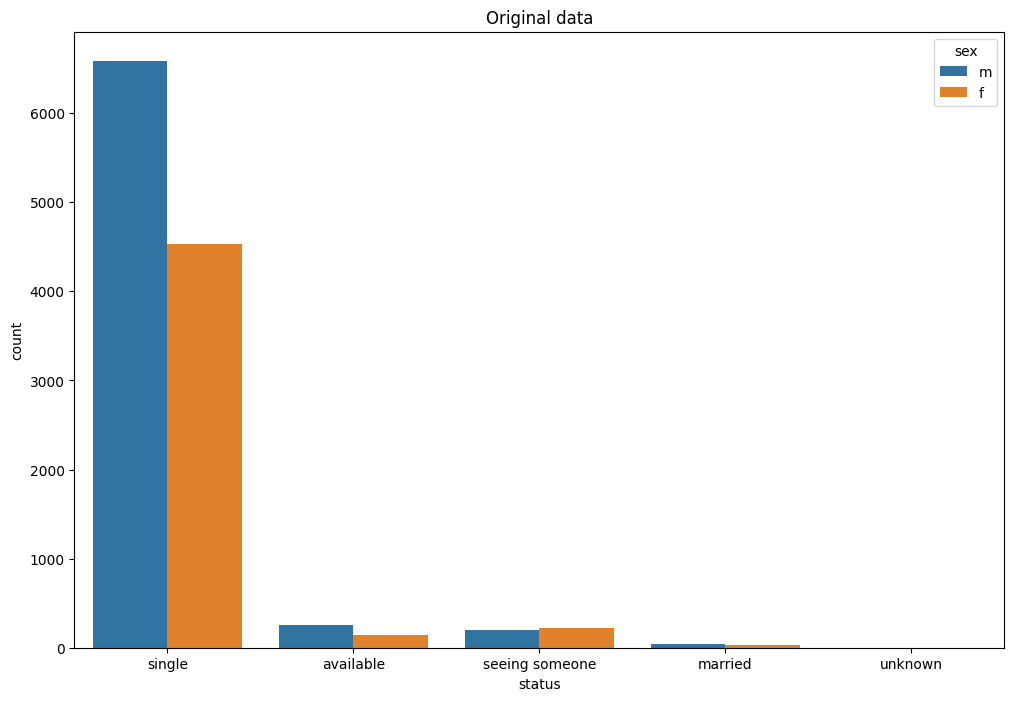

In [306]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_misclassified,x='status',hue='sex')
plt.title("Misclassified data")
plt.figure(figsize=(12,8))
sns.countplot(data=X_test_2, x='status',hue='sex')
plt.title("Original data")
# Again, if you are available or single,
# you are more likely to be misclassified if you are male


In [ ]:
#df.to_csv("cleaned_cupid.csv")

In [301]:
X.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'offspring', 'pets', 'religion', 'smokes', 'speaks'],
      dtype='object')

Text(0.5, 1.0, 'Original data')

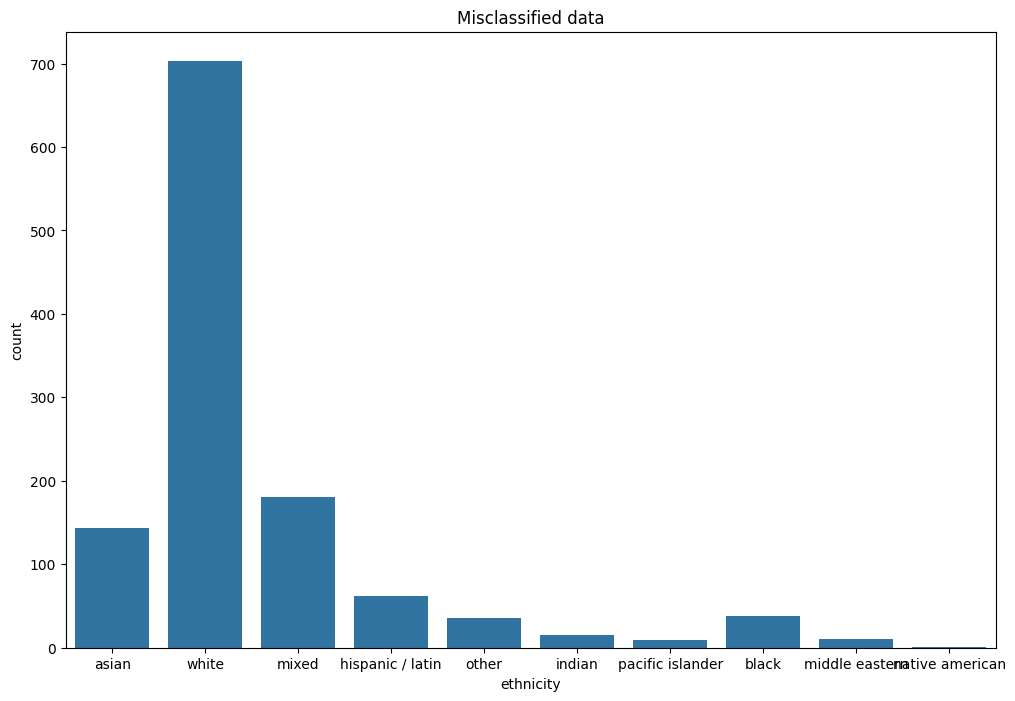

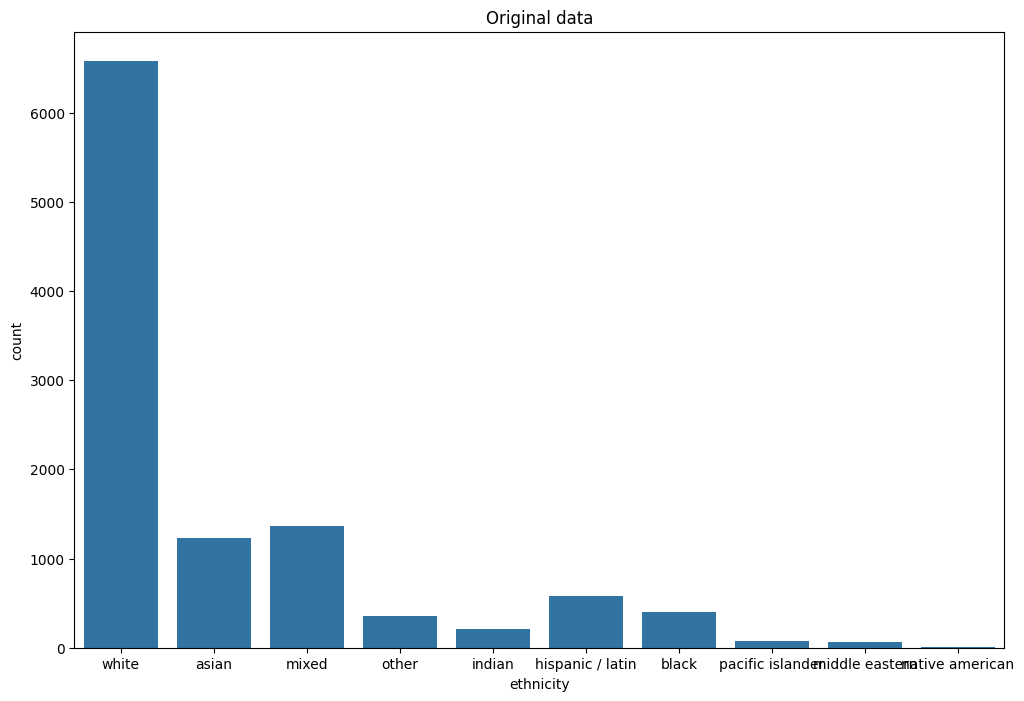

In [308]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_misclassified,x='ethnicity')
plt.title("Misclassified data")
plt.figure(figsize=(12,8))
sns.countplot(data=X_test_2, x='ethnicity')
plt.title("Original data")
# Not much here

Text(0.5, 1.0, 'Original data')

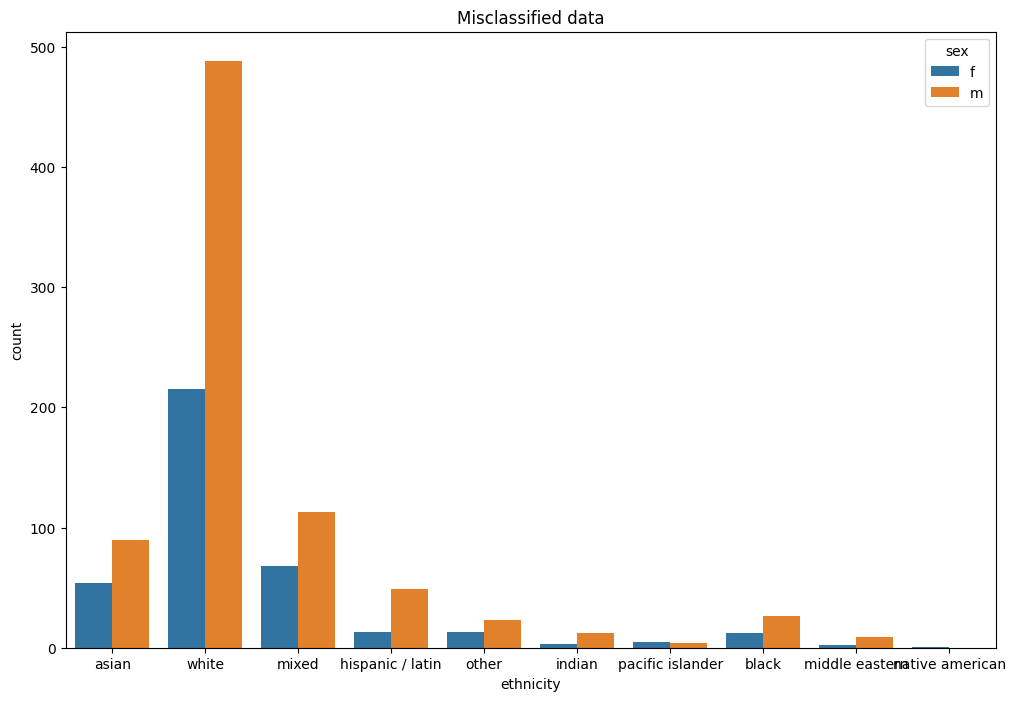

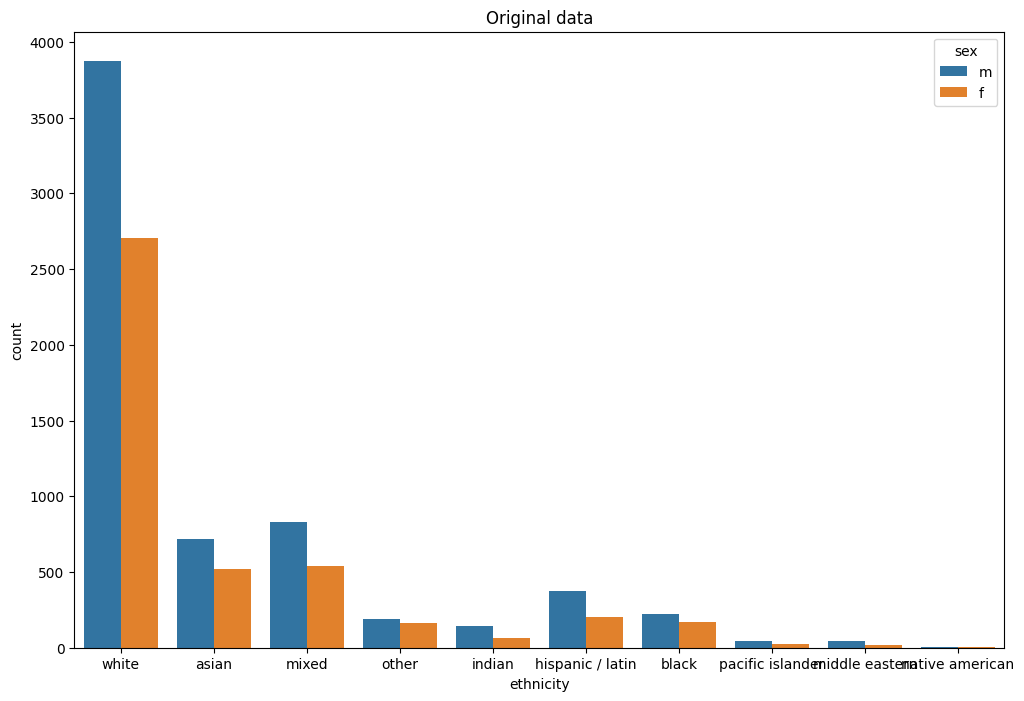

In [307]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_misclassified,x='ethnicity',hue='sex')
plt.title("Misclassified data")
plt.figure(figsize=(12,8))
sns.countplot(data=X_test_2, x='ethnicity',hue='sex')
plt.title("Original data")
# Again, No matter what religion you have, there is more bias
# against men